# Introduction
- Add introduction here

In [3]:
# the cell below is needed to enable equation numbering

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Gradient Descent

We're going to explore gradient descent via example.  We'll use the following function: 
$$
\begin{align}
    f(x,y) = x^2+3y^2
\end{align}
$$
which has a gradient of:
$$
\begin{align}
    \nabla f &= \dfrac{\partial f}{\partial x} \hat x + \dfrac{\partial f}{\partial y} \hat y \\
             &= 2x \hat x + 6y \hat y
\end{align}
$$

$\hat x$ and $\hat y$ are unit vectors in the $x$ and $y$ direction, respectively.


**How do we want to move on the gradient?**  
We want to move opposite of the gradient because the gradient moves away from the minimum.

**Formula we need to determine our next "guess" for the minimum**
$$
\begin{align}
    \zeta(\tau) = \vec x - \tau \nabla f(\vec x)
\end{align}
$$
In words, this means our next point is our current point minus $\tau \nabla f(\hat x)$. We are subtracting here because we want to move against the gradient.  $\tau$ determines how much/how far we are going to move.

**How do we determine $\tau \,$?**  
> **Step 1:** Let's define a new equation:

$$
\begin{align}
    F(\tau) \, &= \, f(\zeta(\tau)) \\
\end{align}
$$
> **Step 2:**  Since we are seeking to find the minimum we are looking for where the derivative equals 0. We will apply the chain rule to our equation $F(\tau)$.

$$
\begin{align}
&= \dfrac{\partial F}{\partial \tau} = - \nabla f(\zeta) \nabla f (\vec x) \\
               &= 0
\end{align}
$$

> **Step 3:** Let's solve for $\xi$
$$
\begin{align}
    \xi &= \vec x - \tau \nabla f (\vec x) \\
    &= \vec x - 2x \hat x \tau - 6y \hat y \tau \\
    &= (1-2\tau)x \hat x + (1-6\tau) y \hat y \\
\end{align}
$$

> **Step 4:** Plug this into equation (5) and find $\tau$. 
$$
\begin{align}
    F(t) &= f(\vec \xi(\tau)) \\
        &= (1-2\tau)^2 x^2 + 3(1-6 \tau)^2 y^2
\end{align}
$$
To find equation 11, we simply plugged equation (9) into our given equation (i.e. equation (1)).  

> **Step 5:** Let's take the derivative of $F(\tau)$ and set it equal to 0. 
$$
\begin{align}
    F'(\tau) &= -4 (1-2\tau)x^2 - 36(1-6\tau) y^2 = 0
\end{align}
$$

> **Step 6:** Solve for $\tau$
$$
\begin{align}
    \tau = \dfrac{x^2 - 9y^2}{2x^2 + 54 y^2}
\end{align}
$$

> **Step 7:** Plug $\tau$ into equation (4).

# Gradient Descent on Sample Function
- This code will generate a 3D graph.  The surface area of the function is shown along with the initial guess and path of the gradient descent to find the minimum

In [2]:
# This is needed to make 3D plot interactive
%matplotlib qt

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
# Create meshgrid and function values
x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)
X,Y = np.meshgrid(x,y)

# Function: x^2 + 3y^2
Z = X**2 + (3*Y**2)

In [4]:
# Create lists to track values of inputs (i.e. x and y) and output (i.e. our_function)
x_values = []
y_values = []
our_function_values = []

# Create our_function
def our_function(x,y):
    return x**2 + (3*y**2)

#initial guess
x_values.append(2)
y_values.append(2)
our_function_values.append(our_function(x_values[0], y_values[0]))

for i in range(0,100):
    tau = (x_values[i]**2 + 9*y_values[i]**2) / (2*x_values[i]**2 + 54*y_values[i]**2) #equation 14
    x_values.append((1-2*tau) * x_values[i])
    y_values.append((1-6*tau) * y_values[i])
    our_function_values.append(x_values[i+1]**2 + 3*y_values[i+1]**2)
    
    if abs(our_function_values[i+1] - our_function_values[i]) < 10**(-6):
        break

In [5]:
# Plot the surface in 3D and a line of our gradient descnt
ax = plt.axes(projection='3d') # Create 3d plot object

# Create our plot space (i.e. x and y axis, plus the output of our function)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none',alpha=.3)

#ax.scatter(x_values,y_values,our_function_values, alpha=1, c='black', s=40) # this plots our gradient descent 
ax.plot(x_values,y_values,our_function_values, 'bo',linestyle='dashed') # this plots our gradient descent 
ax.set_title('surface');

# Clear background
ax.patch.set_facecolor('white')
ax.grid(False) # clear grid
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

# Axix labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show() # this will create a pop-up box with an interactive 3D plot

For .html versions of the notebook, a non-interactice screenshot of the plot is here

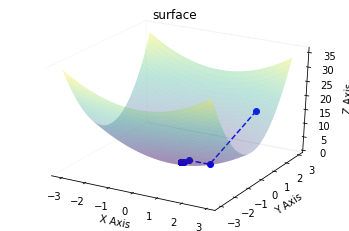

In [6]:
from IPython.display import Image 
pil_img = Image(filename='images/gradient_descent.png')
display(pil_img)

# MCMC Gradient Descent
- This is a recommended approach from Nick Polson (U. Chicago)